In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
img = cv2.imread('window.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [7]:
print(np.transpose(hist))

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 2.000e+00 1.000e+00 2.000e+00 2.000e+00 2.000e+00 2.000e+00
  8.000e+00 5.000e+00 1.100e+01 1.000e+01 1.500e+01 1.200e+01 2.100e+01
  2.300e+01 3.800e+01 4.500e+01 5.200e+01 5.200e+01 5.700e+01 7.000e+01
  6.100e+01 8.400e+01 8.500e+01 9.400e+01 1.050e+02 1.130e+02 1.240e+02
  1.120e+02 1.190e+02 1.290e+02 1.250e+02 1.520e+02 1.800e+02 1.950e+02
  2.380e+02 2.680e+02 3.190e+02 3.730e+02 4.620e+02 5.360e+02 6.340e+02
  7.270e+02 9.450e+02 1.077e+03 1.170e+03 1.328e+03 1.549e+03 1.822e+03
  2.021e+03 2.238e+03 2.375e+03 2.512e+03 2.659e+03 2.721e+03 2.668e+03
  2.785e+03 2.518e+03 2.353e+03 2.170e+03 1.961e+03 1.861e+03 1.654e+03
  1.445e+03 1.313e+03 1.180e+03 1.048e+03 9.340e+02 8.930e+02 7.950e+02
  7.210e+02 6.640e+02 6.150e+02 5.740e+02 6.050e+02 5.990e+02 5.730e+02
  6.700e+02 7.350e+02 7.710e+02 8.190e+02 7.490e+02 7.370e+02 7.970e+02
  7.410e+02 7.430e+02 8.050e+02 8.050e+02 8.320e+02 8.080e+02 8.

In [8]:
hist = np.bincount(img.ravel(),minlength=256)

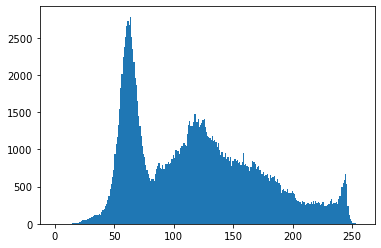

In [10]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

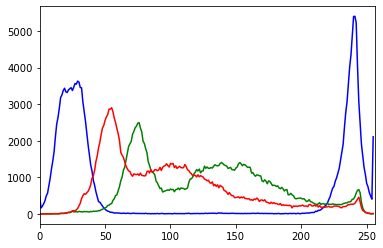

In [12]:
img = cv2.imread('window.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

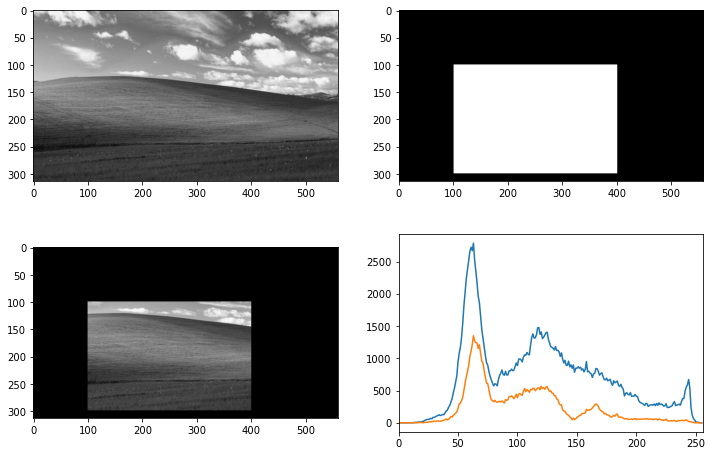

In [13]:
img = cv2.imread('window.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

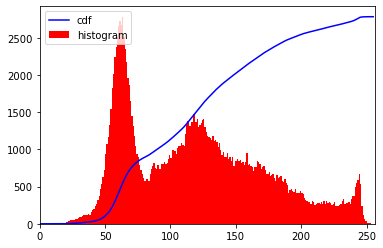

In [14]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [15]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img2 = cdf[img]

In [25]:
img = cv2.imread('window.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

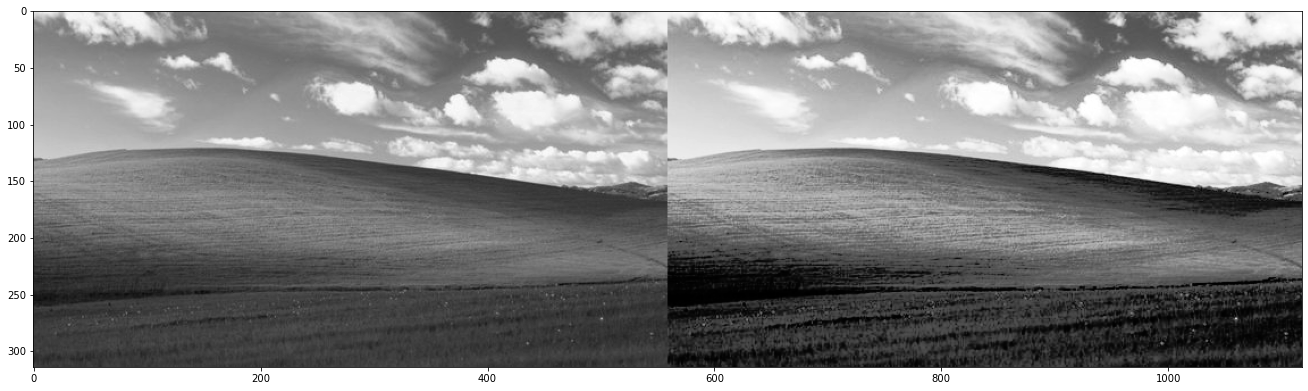

In [32]:
plt.figure(figsize=(50, 10))
plt.subplot(121),plt.imshow(res,'gray')
plt.show()